In [18]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import utils.graph_utils as graph_utils
import utils.IO_utils as io_utils
import os
import importlib
from sklearn import metrics

In [19]:
# reload module
importlib.reload(graph_utils)
importlib.reload(io_utils)
#importlib.reload(plot_utils)

<module 'utils.IO_utils' from '/Users/anton/local/repos/asds/results/utils/IO_utils.py'>

In [20]:
#input_file = "anthrocon"
#input_file = "comiccon2017"
input_file = "icann2016"

In [21]:
# load labels
labels_true, k = io_utils.load_ground_true(file_name=input_file+"/twitter")

# load graph
G = graph_utils.load_csv_edges(os.path.join('./data', input_file, 'twitter' + '.csv'), undirected=True)


In [22]:
# first compute the best partition
partition = community.best_partition(G)

partition

{552: 0,
 394: 1,
 305: 2,
 916: 3,
 595: 0,
 82: 3,
 101: 2,
 506: 2,
 253: 0,
 604: 4,
 574: 3,
 355: 3,
 472: 0,
 865: 4,
 852: 5,
 250: 5,
 839: 0,
 1001: 4,
 56: 0,
 412: 3,
 717: 3,
 152: 0,
 675: 3,
 527: 4,
 649: 2,
 678: 3,
 42: 5,
 814: 4,
 335: 4,
 337: 0,
 461: 1,
 553: 5,
 578: 0,
 127: 2,
 694: 0,
 868: 4,
 999: 4,
 74: 5,
 709: 5,
 886: 4,
 123: 3,
 166: 5,
 562: 4,
 389: 0,
 840: 4,
 458: 5,
 601: 5,
 559: 3,
 132: 0,
 464: 4,
 490: 2,
 736: 2,
 632: 0,
 890: 5,
 780: 2,
 121: 0,
 170: 4,
 325: 4,
 233: 4,
 919: 3,
 725: 4,
 12: 1,
 915: 6,
 130: 5,
 790: 3,
 92: 1,
 162: 5,
 745: 4,
 769: 1,
 995: 4,
 676: 1,
 263: 3,
 446: 2,
 800: 4,
 891: 3,
 49: 4,
 151: 3,
 187: 4,
 633: 5,
 25: 1,
 712: 2,
 89: 0,
 539: 3,
 1007: 3,
 567: 0,
 43: 3,
 269: 3,
 307: 0,
 668: 4,
 582: 4,
 854: 4,
 158: 5,
 1: 4,
 15: 5,
 905: 1,
 224: 5,
 75: 4,
 515: 1,
 34: 4,
 110: 2,
 529: 0,
 358: 1,
 641: 3,
 763: 5,
 54: 4,
 528: 4,
 429: 1,
 441: 3,
 225: 0,
 457: 0,
 241: 1,
 855: 5,
 898: 

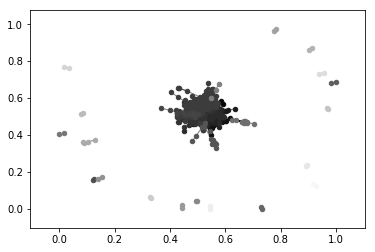

In [23]:
# drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [24]:
# labels_pred

labels_pred = [partition[key] for key in sorted(partition.keys())]

In [25]:
print("labels_true: ", labels_true)
print("labels_pred: ", labels_pred)

labels_true:  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0

In [26]:
# NMI

metrics.normalized_mutual_info_score(labels_true, labels_pred)

0.022490173335737017